In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import ast

# Loading Data the Locational Data

In [55]:
locational_data = pd.read_csv('../3.Prepared Data/locational_data.csv')
locational_data.head(1)

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following,caption_emotions,most_powerful_emotion,emotion_score
0,40506412,christinehmcconnell,CzJtDjegmdI,False,Had an amazing time in #salem for Halloween th...,466,79000,1.698945e+09,salem-massachusetts,https://instagram.ffor43-1.fna.fbcdn.net/v/t39...,True,christinehmcconnell,597189.0,1576.0,"{'neg': 0.020397255, 'neu': 0.08311723, 'pos':...",pos,0.896486


In [56]:
non_locational_data = pd.read_csv('../3.Prepared Data/non_locational_data.csv')
non_locational_data.head(1)

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,imageUrl,multiple_images,username,followers,following,caption_emotions,most_powerful_emotion,emotion_score
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0,"{'neg': 0.034616627, 'neu': 0.6108251, 'pos': ...",neu,0.610825


# Handlings Duplicates

In [60]:
non_locational_data.drop_duplicates(inplace=True)
locational_data.drop_duplicates(inplace=True)

# looking at DataTypes 

In [61]:
locational_data.shape

(2784, 17)

In [62]:
non_locational_data.shape

(6844, 16)

In [63]:
# print(locational_data.info())
print(non_locational_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6844 entries, 0 to 9440
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   owner_id               6844 non-null   int64  
 1   owner_username         6844 non-null   object 
 2   shortcode              6844 non-null   object 
 3   is_video               6844 non-null   bool   
 4   caption                6844 non-null   object 
 5   comments               6844 non-null   int64  
 6   likes                  6844 non-null   int64  
 7   created_at             6844 non-null   float64
 8   imageUrl               6844 non-null   object 
 9   multiple_images        6844 non-null   bool   
 10  username               6844 non-null   object 
 11  followers              6844 non-null   float64
 12  following              6844 non-null   float64
 13  caption_emotions       6844 non-null   object 
 14  most_powerful_emotion  6844 non-null   object 
 15  emotion_s

Looking good. This data is already clean, so I'll proceed with visualization straight away.

---------------



# Analysis Based on User

in this part i will look at activities of one of most active account is this dataset. to find most active account:

In [64]:
non_locational_data.groupby(by="owner_username").agg({"caption" : "count"}).sort_values(by="caption" ,ascending=False).head(3)

,caption
owner_username,
mensfashions,37
enjoyphoenix,24
emilyskyefit,22


most active account in this dataset is account with username `mensfashions`. as you see there are over 30 posts of this account in this dataset; so by looking at activities of this account we can predict next activities of this account.

this account is a perfect account for this objective, it has high number of followers (around `1.9 M`) and following a low number of following (just `11 accounts`)

In [66]:
mensfashions = non_locational_data.loc[non_locational_data["owner_username"] == "mensfashions"]
mensfashions.head(3)

C:\Users\saeed\AppData\Local\Temp\ipykernel_6652\3616988648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mensfashions["date"] = pd.to_datetime(mensfashions['created_at'], unit='s').dt.date
C:\Users\saeed\AppData\Local\Temp\ipykernel_6652\3616988648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mensfashions["time"] = pd.to_datetime(mensfashions['created_at'], unit='s').dt.time


,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,imageUrl,multiple_images,username,followers,following,caption_emotions,most_powerful_emotion,emotion_score,date,time
1416,184378318,mensfashions,C3U-uVbt0SL,False,Suit up Inspo 🔥 by @artworth_brothers,5,2307,1.707914e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,True,mensfashions,1957620.0,11.0,"{'neg': 0.034818787, 'neu': 0.32848975, 'pos':...",pos,0.636691,2024-02-14,12:25:03
1417,184378318,mensfashions,C3IhWn1t_mM,True,Channeling the inner dad ☕️,14,2507,1.707495e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,False,mensfashions,1957620.0,11.0,"{'neg': 0.046530932, 'neu': 0.50175273, 'pos':...",neu,0.501753,2024-02-09,16:18:19
1418,184378318,mensfashions,C3FVQcZNPFe,False,Italian style inspiration 🇮🇹,5,1566,1.707388e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,True,mensfashions,1957620.0,11.0,"{'neg': 0.03071826, 'neu': 0.14121525, 'pos': ...",pos,0.828066,2024-02-08,10:34:06


In [67]:
mensfashions.loc[mensfashions["likes"] > 5000]

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,imageUrl,multiple_images,username,followers,following,caption_emotions,most_powerful_emotion,emotion_score,date,time
3075,184378318,mensfashions,Cnziriku8ve,True,Unboxing the NEW Jeep Wagoneer!🎁\nDo you like ...,125,11651,1.674579e+09,https://scontent-lhr6-2.cdninstagram.com/v/t51...,False,mensfashions,1957620.0,11.0,"{'neg': 0.039306264, 'neu': 0.5155821, 'pos': ...",neu,0.515582,2023-01-24,16:57:01
4932,184378318,mensfashions,CxeC1RDNoX_,True,Via: @luxurylifestylemagazine That’s one way t...,188,6343,1.695333e+09,https://instagram.fkul3-3.fna.fbcdn.net/v/t51....,False,mensfashions,1957620.0,11.0,"{'neg': 0.053318985, 'neu': 0.4320326, 'pos': ...",pos,0.514648,2023-09-21,21:47:28


In [75]:
list(mensfashions.loc[mensfashions["shortcode"] == "CxeC1RDNoX_"]["caption"])

['Via: @luxurylifestylemagazine That’s one way to get into a Lamborghini Urus 🔥\n\nBy @darya_antukhevich @vasia_lavr']

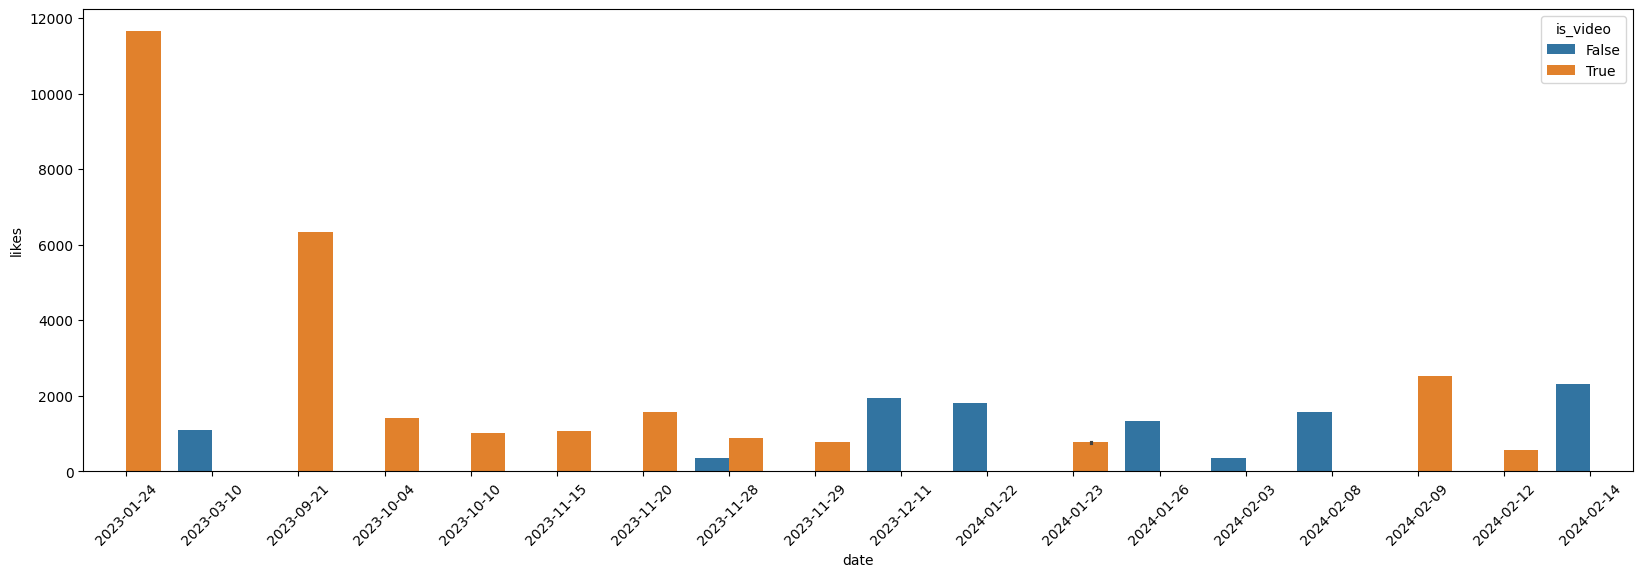

In [33]:
plt.figure(figsize=(20, 6))

ax = sns.barplot(data=mensfashions.sort_values(by="created_at", ascending=True),
            x="date",
            y="likes", 
            hue="is_video")


plt.xticks(rotation=45)
plt.show()

as you can see the most like content of this account are videos. 
1. what are these posts about?
2. what time of they these posts are committed? is there any difference between time of upload of these posts and other posts?
3. what are emotions of these posts and what are comments of these posts?


------------

# Based on Hashtags

## most used hashtags Based on time and location

selecting 

In [55]:
hashtag_intercept = dict()  # Initialize once, outside the loop

for index in range(len(locational_data["hashtag"])):
    hashtag_list = ast.literal_eval(locational_data["hashtag"][index])

    if len(hashtag_list) > 0:
        code = locational_data["shortcode"][index]
    
        hashtag_intercept[code] = {
            "hashtag": hashtag_list,
            "likes": locational_data["likes"][index],
            "comments": locational_data["comments"][index],
            "location": locational_data["location"][index],
            "emotion": locational_data["most_powerful_emotion"][index],
            "emotion_score": locational_data["emotion_score"][index]
        }

print(hashtag_intercept)


{'CzJtDjegmdI': {'hashtag': ['salem', 'halloween', 'salemjack'], 'likes': 79000, 'comments': 466, 'location': 'salem-massachusetts', 'emotion': 'pos', 'emotion_score': 0.89648557}, 'C1ABSmGMu1d': {'hashtag': ['stopmotions', 'stopmotionslovers', 'stopmotionvideo', 'stopmotionanimation', 'roughanimator', 'aftereffects'], 'likes': 297, 'comments': 25, 'location': 'guayaquil-ecuador', 'emotion': 'pos', 'emotion_score': 0.6716712}, 'C372ffZOk1L': {'hashtag': ['stopmotion', 'stopmotionanimation'], 'likes': 1317, 'comments': 73, 'location': 'guayaquil-ecuador', 'emotion': 'neu', 'emotion_score': 0.62456393}, 'C3VT_Sos__Z': {'hashtag': ['stopmotion', 'Dragonframe', 'Procreate', 'ProcreateDreams.'], 'likes': 680, 'comments': 22, 'location': 'guayaquil-ecuador', 'emotion': 'pos', 'emotion_score': 0.65119904}, 'C0Md_EOs5Ni': {'hashtag': ['Guayaquil!', 'RoughAnimator', 'AfterEffects', 'ThinkEcuador', 'RoughAnimator', 'AfterEffects'], 'likes': 268, 'comments': 7, 'location': 'guayaquil-ecuador', 'e

## most used Hashtags, with out considering location

----------

# Based on number of likes
1. how are changes of number of likes and comments and deviation of them, Based on:

1.1 location

1.2 time

1.2 emotions

----

# Based on location

what are most used hashtags and developed emotions Based on location over time
where do longest captions belong?